In [1]:
#Guiding Questions: 
#Which variables have the strongest positive and negative correlation to high life expectancy? 
#Are there any similarities in variable outcomes based on Developed vs Developing countries? 
#Are there similar trends when considering various columns related to vaccinations vs income/wealth vs deaths? 
#If a disease like Hepatitis B is present at high levels in certain countries, is there correlation with other diseases as well?


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import sklearn
import plotly.express as px
import seaborn as sns
from scipy import stats
df = pd.read_csv('Life Expectancy Data.csv')
df.head()




,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
# GENERAL TIME PLOT WITH LIFE EXPECTANCY

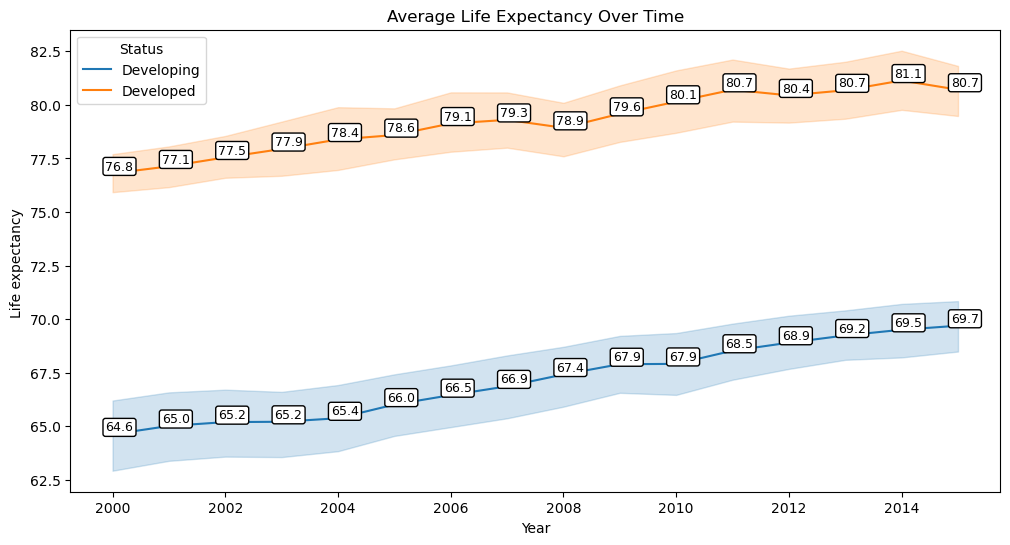

In [4]:
average_life_expectancy = df.groupby(['Year', 'Status'])['Life expectancy '].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Life expectancy ', hue='Status')

# Annotate the plot with average values
for status in average_life_expectancy['Status'].unique():
    status_data = average_life_expectancy[average_life_expectancy['Status'] == status]
    for i, row in status_data.iterrows():
        plt.annotate(f"{row['Life expectancy ']:.1f}", xy=(row['Year'], row['Life expectancy ']), xytext=(5, 5), textcoords='offset points', ha='center', va='center', fontsize=9, color='black', bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='white'))
plt.title('Average Life Expectancy Over Time')
plt.show()

In [5]:
# OVERALL COEFFICIENT MATRIX INFO

In [6]:
df_quant = df.drop(columns=['Country', 'Status', 'Year'])
genCorrelation_matrix = df_quant.corr()
life_expectancy_genCorr = genCorrelation_matrix['Life expectancy '].sort_values(ascending=False)
print(life_expectancy_genCorr)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


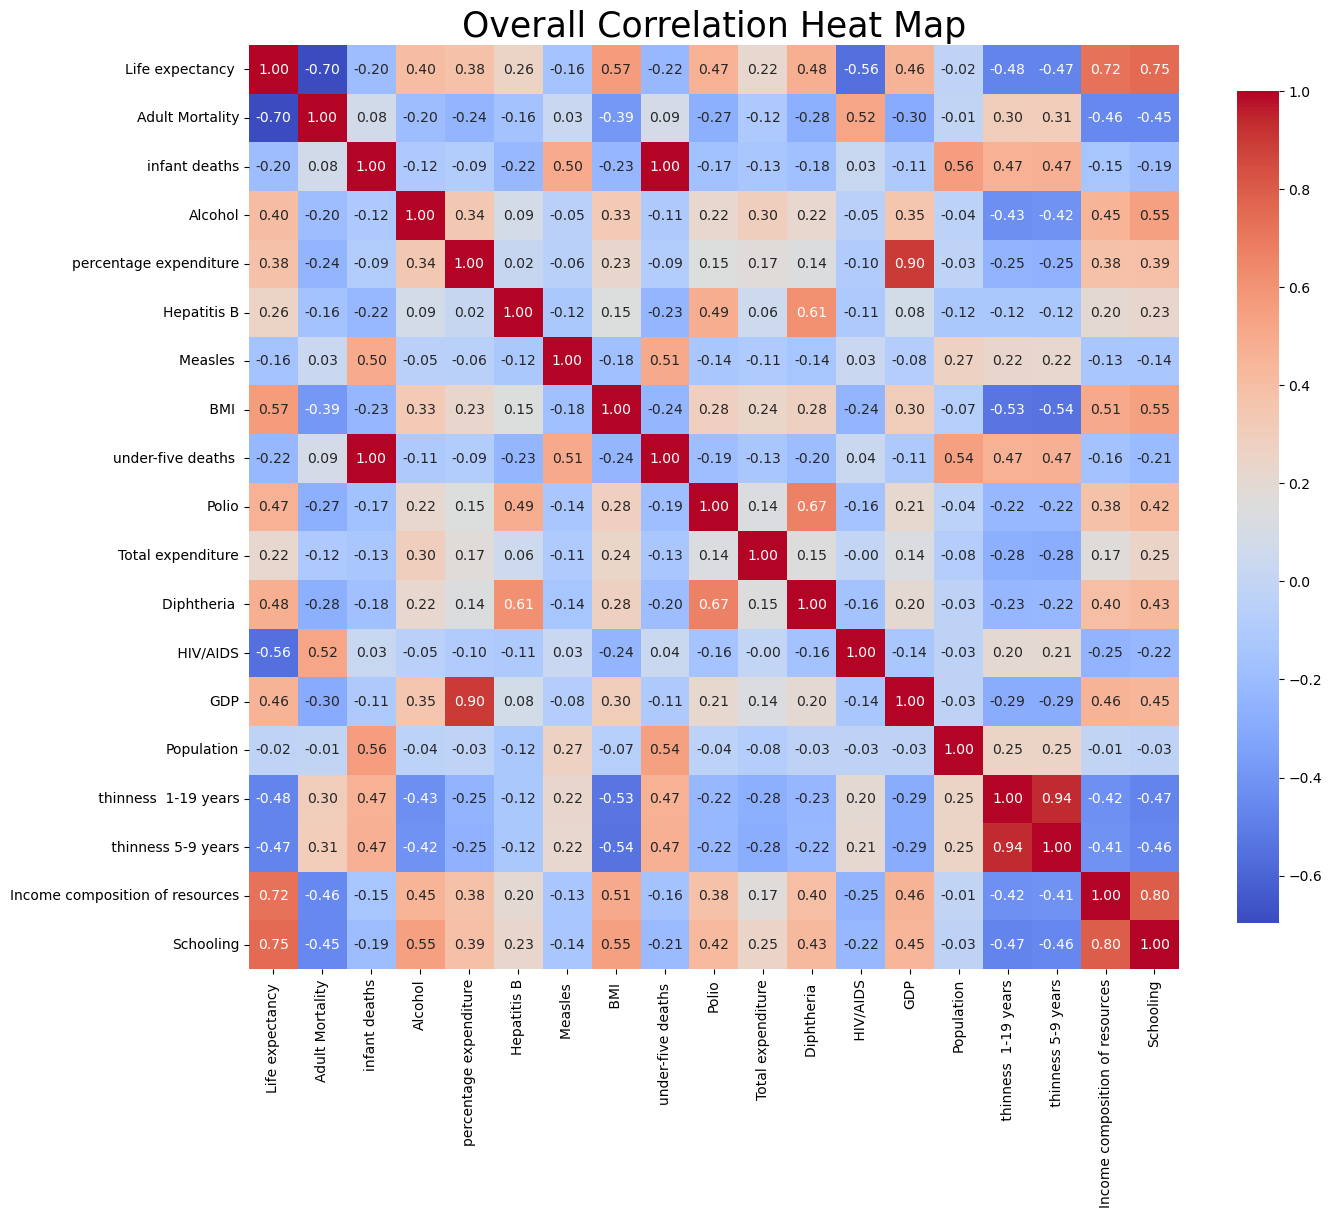

In [7]:
plt.figure(figsize=(15, 12))
sns.heatmap(genCorrelation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'shrink': .9})
plt.title('Overall Correlation Heat Map', size = 25)
plt.show()

In [8]:
# LOOKING SPECIFICALLY AT DEVELOPING COUNTRIES

In [9]:
df_developing = df[df["Status"].isin(["Developing"])]
df_developing

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [10]:
# REMOVING ALL NAN VALUES WHICH MIGHT AFFECT THE DATASET AND FINDING THE STRONGEST CORRELATIONS AMONGST DEVELOPING COUNTRIES

In [11]:
developing_quantUpdate = df_developing.dropna().drop(columns=['Country', 'Status', 'Year'])
devCorrelationUpd_matrix = developing_quantUpdate.corr()
life_expectancy_updDevCorr = devCorrelationUpd_matrix['Life expectancy '].sort_values(ascending=False)
print('\033[1m' + "Coefficient Matrix for the Life Expectancy Variable")
print('\033[0m')
print(life_expectancy_updDevCorr)

Coefficient Matrix for the Life Expectancy Variable

Life expectancy                    1.000000
Schooling                          0.670470
Income composition of resources    0.649761
 BMI                               0.523660
GDP                                0.415982
percentage expenditure             0.374700
Diphtheria                         0.296271
Polio                              0.277503
Alcohol                            0.203788
Hepatitis B                        0.171144
Total expenditure                  0.097243
Population                        -0.010427
Measles                           -0.041629
infant deaths                     -0.138615
under-five deaths                 -0.164715
 thinness 5-9 years               -0.373670
 thinness  1-19 years             -0.374320
 HIV/AIDS                         -0.614953
Adult Mortality                   -0.681218
Name: Life expectancy , dtype: float64


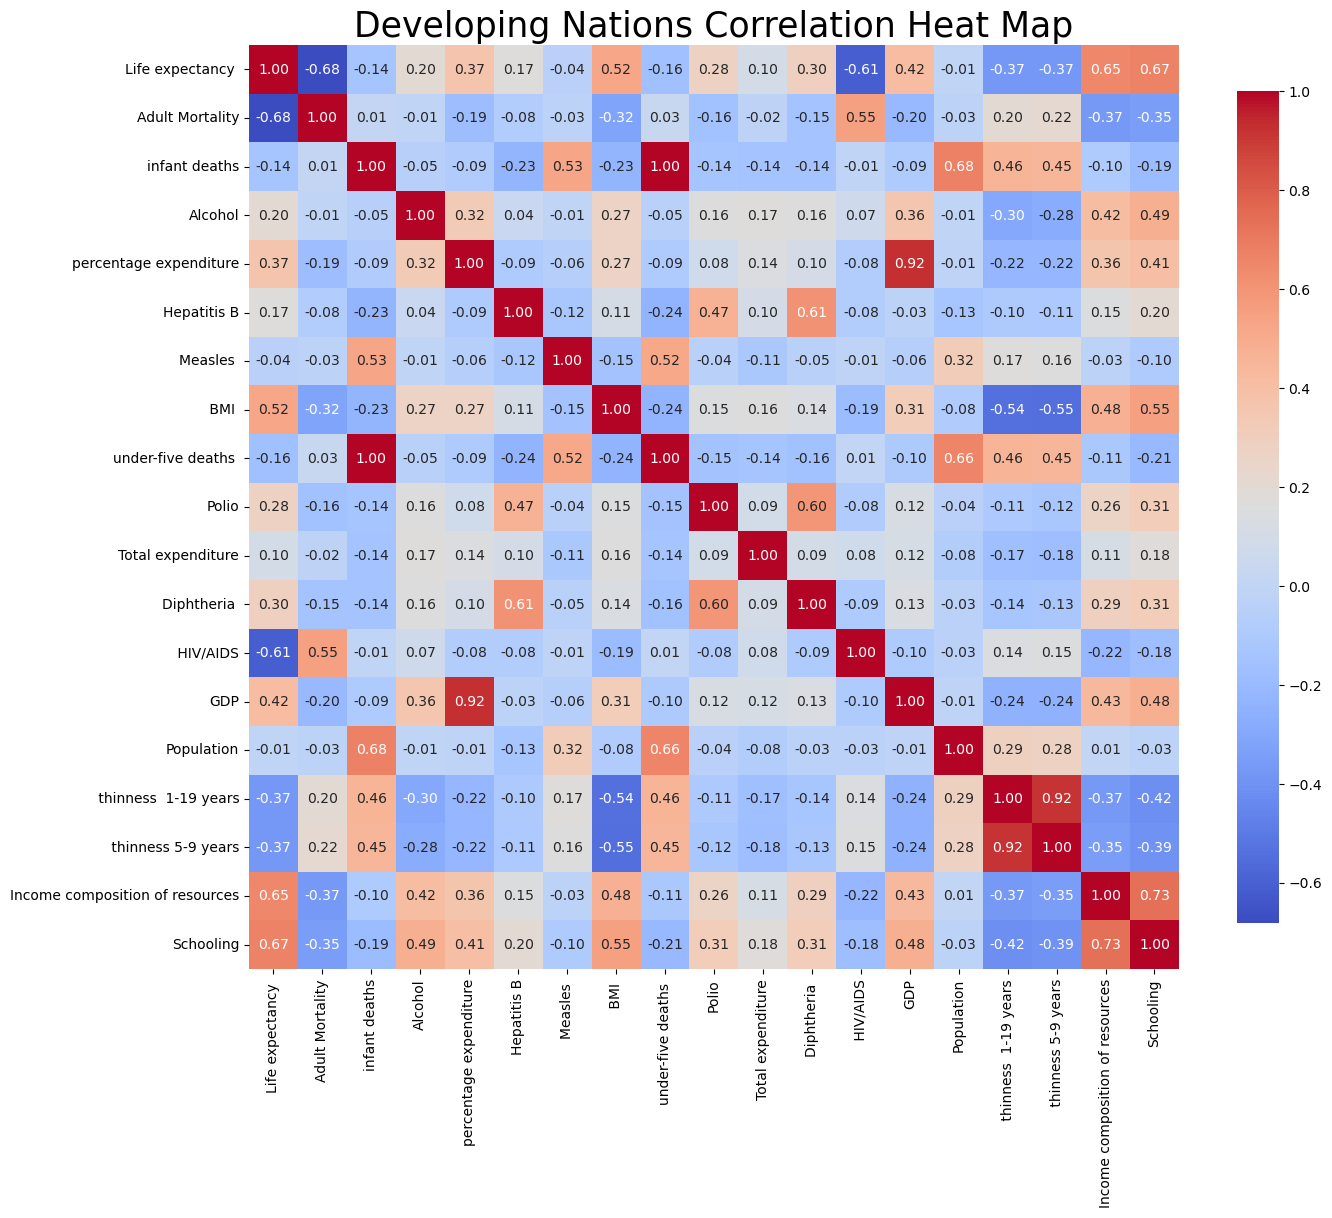

In [12]:
plt.figure(figsize=(15, 12))
sns.heatmap(devCorrelationUpd_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'shrink': .9})
plt.title('Developing Nations Correlation Heat Map', size = 25)
plt.show()

In [13]:
# NEW PLOTS AFTER NA VALUES ARE DROPPED - HIGHEST CORRELATED VARIABLES

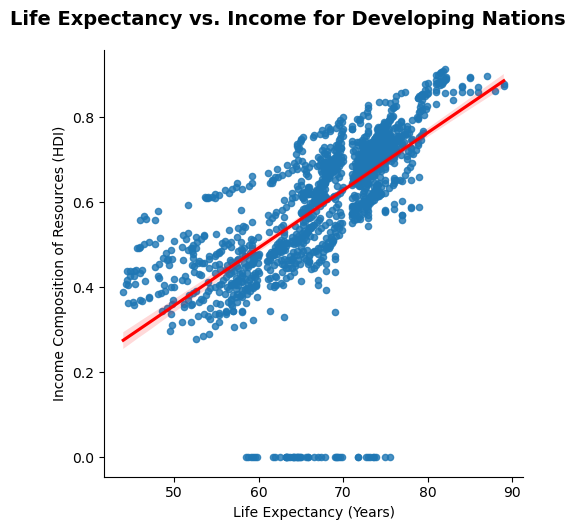

In [14]:
plot = sns.lmplot(x="Life expectancy ", y="Income composition of resources", data=df_developing.dropna(), scatter_kws={'s': 20}, line_kws={'color': 'red'})
plot.set_axis_labels("Life Expectancy (Years)", "Income Composition of Resources (HDI)")
plt.suptitle("Life Expectancy vs. Income for Developing Nations", size=14, weight='bold', y=1.05)
plt.show()

In [15]:
# CALCULATING THE R VALUE AND R-SQUARE VALUE

In [16]:
x = df_developing.dropna()["Life expectancy "]
y = df_developing.dropna()["Income composition of resources"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2
print(f'P-Value: {p_value:.4f}')
print(f'Correlation Coefficient for Life Expectancy vs. Income (r): {r_value:.4f}')
print(f'R-squared value (R^2): {r_squared:.4f}')

P-Value: 0.0000
Correlation Coefficient for Life Expectancy vs. Income (r): 0.6498
R-squared value (R^2): 0.4222


In [17]:
# FINDING OUTLIERS USING THE Z-SCORE METHOD AND RECALCULATING R, R^2

In [18]:
z_scores_lifeexpectancy = stats.zscore(df_developing.dropna()["Life expectancy "])
z_scores_income = stats.zscore(df_developing.dropna()["Income composition of resources"])
threshold = 3 # +-3 STANDARD DEVIATION OUTLIER FOR LINEAR REGRESSION ANALYSIS
outliers_lifeexp = np.abs(z_scores_lifeexpectancy) > threshold
outliers_income = np.abs(z_scores_income) > threshold
combined_outliers = outliers_lifeexp | outliers_income

# REMOVE OUTLIERS
clean_lifeexp = x[~combined_outliers]
clean_income = y[~combined_outliers]

In [19]:
x = clean_lifeexp
y = clean_income
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2
print(f'P-Value: {p_value:.4f}')
print(f'Correlation Coefficient for Life Expectancy vs. Income (r): {r_value:.4f}')
print(f'R-squared value (R^2): {r_squared:.4f}')

P-Value: 0.0000
Correlation Coefficient for Life Expectancy vs. Income (r): 0.8276
R-squared value (R^2): 0.6849


In [20]:
# GRAPHING THE OUTLIER REMOVED SCATTER PLOT

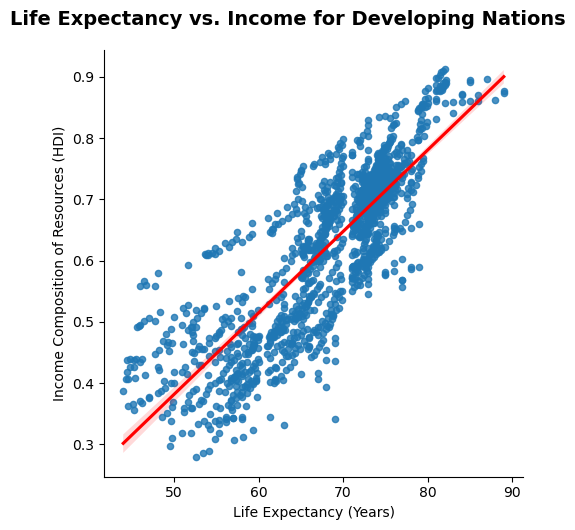

In [21]:
df_var1cleaned = pd.DataFrame({'Life Expectancy': clean_lifeexp, 'Income Index': clean_income})
plot = sns.lmplot(x="Life Expectancy", y="Income Index", data=df_var1cleaned, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plot.set_axis_labels("Life Expectancy (Years)", "Income Composition of Resources (HDI)")
plt.suptitle("Life Expectancy vs. Income for Developing Nations", size=14, weight='bold', y=1.05)
plt.show()


In [22]:
# SAME PROCESS FOR THE ADULT MORTALITY

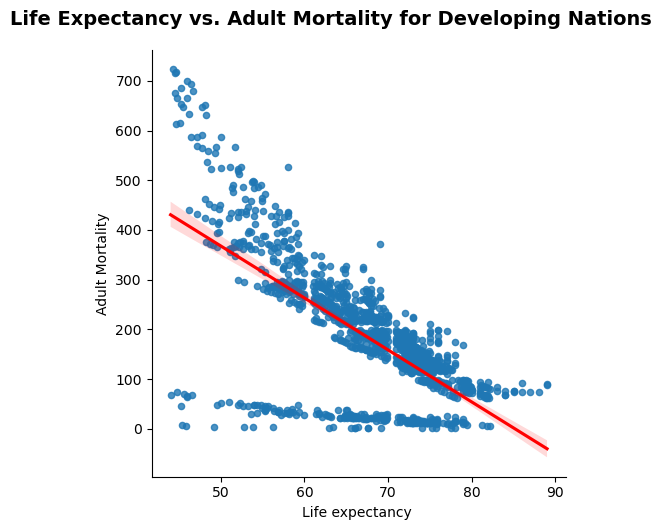

In [23]:
plot = sns.lmplot(x="Life expectancy ", y="Adult Mortality", data=df_developing.dropna(), scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.suptitle("Life Expectancy vs. Adult Mortality for Developing Nations", size=14, weight='bold', y=1.05)
plt.show()

In [24]:
x = df_developing.dropna()["Life expectancy "]
y = df_developing.dropna()["Adult Mortality"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2
print(f'P-Value: {p_value:.200f}')
print(f'Correlation Coefficient for Life Expectancy vs. Adult Mortality (r): {r_value:.4f}')
print(f'R-squared value (R^2): {r_squared:.4f}')

P-Value: 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000158287320
Correlation Coefficient for Life Expectancy vs. Adult Mortality (r): -0.6812
R-squared value (R^2): 0.4641


In [25]:
z_scores_lifeexpectancy = stats.zscore(df_developing.dropna()["Life expectancy "])
z_scores_adultmort = stats.zscore(df_developing.dropna()["Adult Mortality"])
threshold = 3
outliers_lifeexp = np.abs(z_scores_lifeexpectancy) > threshold
outliers_adultmort = np.abs(z_scores_adultmort) > threshold
combined_outliers = outliers_lifeexp | outliers_adultmort

# REMOVE OUTLIERS
clean_lifeexp = x[~combined_outliers]
clean_adultmort = y[~combined_outliers]

In [26]:
x = clean_lifeexp
y = clean_adultmort
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2
print(f'Correlation Coefficient for Life Expectancy vs. Income (r): {r_value:.4f}')
print(f'R-squared value (R^2): {r_squared:.4f}')

Correlation Coefficient for Life Expectancy vs. Income (r): -0.6311
R-squared value (R^2): 0.3983


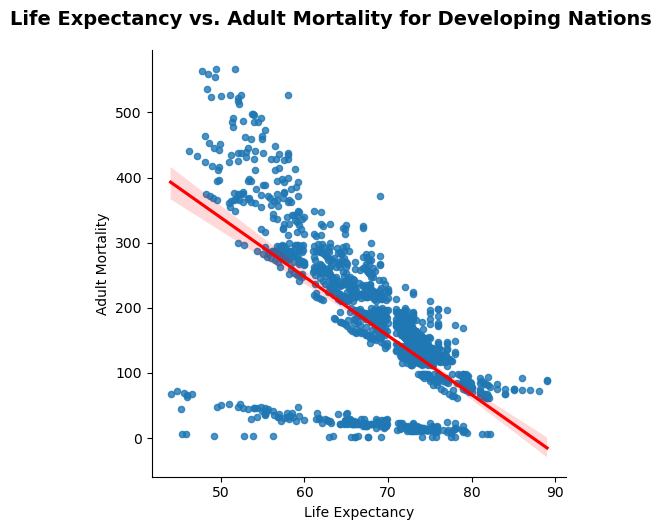

In [27]:
df_var2cleaned = pd.DataFrame({'Life Expectancy': clean_lifeexp,'Adult Mortality': clean_adultmort})

plot = sns.lmplot(x="Life Expectancy", y="Adult Mortality", data=df_var2cleaned, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.suptitle("Life Expectancy vs. Adult Mortality for Developing Nations", size=14, weight='bold', y=1.05)
plt.show()


In [28]:
# SAME PROCESS FOR SCHOOLING VARIABLE

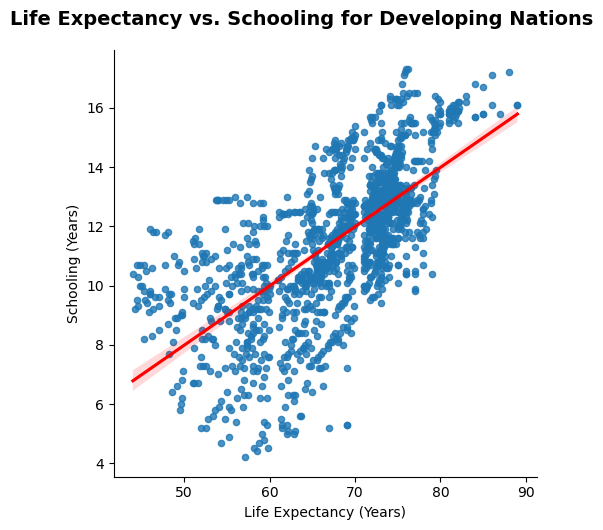

In [29]:
plot = sns.lmplot(x="Life expectancy ", y="Schooling", data=df_developing.dropna(), scatter_kws={'s': 20}, line_kws={'color': 'red'})
plot.set_axis_labels("Life Expectancy (Years)", "Schooling (Years)")
plt.suptitle("Life Expectancy vs. Schooling for Developing Nations", size=14, weight='bold', y=1.05)
plt.show()

In [30]:
x = df_developing.dropna()["Life expectancy "]
y = df_developing.dropna()["Schooling"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2
print(f'Correlation Coefficient for Life Expectancy vs. Schooling (r): {r_value:.4f}')
print(f'R-squared value (R^2): {r_squared:.4f}')

Correlation Coefficient for Life Expectancy vs. Schooling (r): 0.6705
R-squared value (R^2): 0.4495


In [31]:
z_scores_lifeexpectancy = stats.zscore(df_developing.dropna()["Life expectancy "])
z_scores_school = stats.zscore(df_developing.dropna()["Schooling"])
threshold = 3
outliers_lifeexp = np.abs(z_scores_lifeexpectancy) > threshold
outliers_school = np.abs(z_scores_school) > threshold
combined_outliers = outliers_lifeexp | outliers_school

# REMOVE OUTLIERS
clean_lifeexp = x[~combined_outliers]
clean_school = y[~combined_outliers]

In [32]:
x = clean_lifeexp
y = clean_school
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2
print(f'Correlation Coefficient for Life Expectancy vs. Schooling (r): {r_value:.4f}')
print(f'R-squared value (R^2): {r_squared:.4f}')

Correlation Coefficient for Life Expectancy vs. Schooling (r): 0.6705
R-squared value (R^2): 0.4495


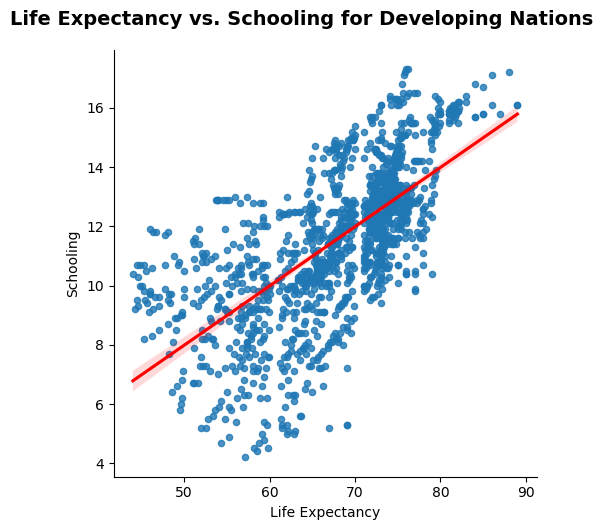

In [33]:
df_var3cleaned = pd.DataFrame({'Life Expectancy': clean_lifeexp,'Schooling': clean_school})

plot = sns.lmplot(x="Life Expectancy", y="Schooling", data=df_var3cleaned, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.suptitle("Life Expectancy vs. Schooling for Developing Nations", size=14, weight='bold', y=1.05)
plt.show()


In [34]:
# What's the correlation between schooling and income composition?

In [35]:
x = df_developing.dropna()["Schooling"]
y = df_developing.dropna()["Income composition of resources"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2
print(f'Correlation Coefficient for Schooling vs. Income Composition (r): {r_value:.4f}')
print(f'R-squared value (R^2): {r_squared:.4f}')

Correlation Coefficient for Schooling vs. Income Composition (r): 0.7309
R-squared value (R^2): 0.5342


In [36]:
z_scores_school = stats.zscore(df_developing.dropna()["Schooling"])
z_scores_income = stats.zscore(df_developing.dropna()["Income composition of resources"])
threshold = 3
outliers_school = np.abs(z_scores_school) > threshold
outliers_income = np.abs(z_scores_income) > threshold
combined_outliers = outliers_school | outliers_income

# REMOVE OUTLIERS
clean_school = x[~combined_outliers]
clean_income = y[~combined_outliers]

In [37]:
x = clean_school
y = clean_income
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2
print(f'Correlation Coefficient for Schooling vs. Income Composition (r): {r_value:.4f}')
print(f'R-squared value (R^2): {r_squared:.4f}')

Correlation Coefficient for Schooling vs. Income Composition (r): 0.9024
R-squared value (R^2): 0.8144


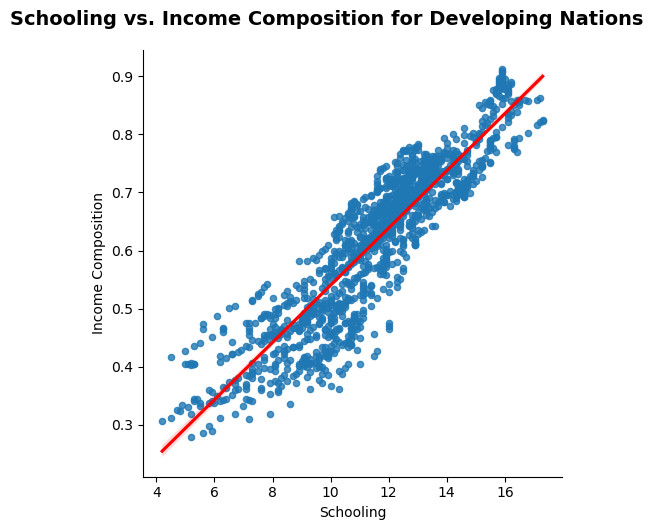

In [38]:
df_var3cleaned = pd.DataFrame({'Schooling': clean_school,'Income Composition': clean_income})

plot = sns.lmplot(x="Schooling", y="Income Composition", data=df_var3cleaned, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.suptitle("Schooling vs. Income Composition for Developing Nations", size=14, weight='bold', y=1.05)
plt.show()


In [39]:
# Lets see if Income Composition correlates with Life Expectancy for developed nations

In [40]:
df_developed = df[df["Status"].isin(["Developed"])]
df_developed

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.00000,93.0,74,...,93.0,NaN,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.36305,91.0,340,...,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.85381,91.0,158,...,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,61.0,1,10.03,11714.99858,91.0,199,...,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,63.0,1,10.30,10986.26527,92.0,190,...,92.0,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.00000,92.0,37,...,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.40,0.00000,92.0,56,...,91.0,15.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.33,0.00000,88.0,41,...,9.0,14.55,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.25,0.00000,89.0,116,...,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN


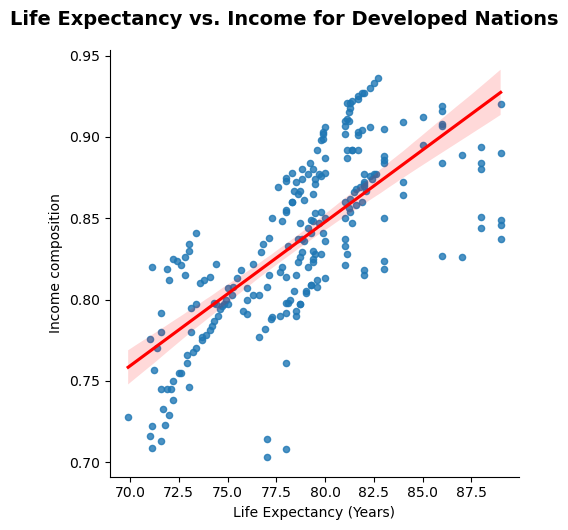

In [41]:
plot = sns.lmplot(x="Life expectancy ", y="Income composition of resources", data=df_developed.dropna(), scatter_kws={'s': 20}, line_kws={'color': 'red'})
plot.set_axis_labels("Life Expectancy (Years)", "Income composition")
plt.suptitle("Life Expectancy vs. Income for Developed Nations", size=14, weight='bold', y=1.05)
plt.show()

In [42]:
x = df_developed.dropna()["Life expectancy "]
y = df_developed.dropna()["Income composition of resources"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2
print(f'Correlation Coefficient for Life Expectancy vs. Schooling (r): {r_value:.4f}')
print(f'R-squared value (R^2): {r_squared:.4f}')

Correlation Coefficient for Life Expectancy vs. Schooling (r): 0.7213
R-squared value (R^2): 0.5203


In [43]:
z_scores_school = stats.zscore(df_developed.dropna()["Life expectancy "])
z_scores_income = stats.zscore(df_developed.dropna()["Income composition of resources"])
threshold = 3
outliers_school = np.abs(z_scores_school) > threshold
outliers_income = np.abs(z_scores_income) > threshold
combined_outliers = outliers_school | outliers_income

# REMOVE OUTLIERS
clean_lifeexp_dev = x[~combined_outliers]
clean_income_dev = y[~combined_outliers]

In [44]:
x = clean_lifeexp_dev
y = clean_income_dev
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2
print(f'Correlation Coefficient for Life Expectancy vs. Income Composition (r): {r_value:.4f}')
print(f'R-squared value (R^2): {r_squared:.4f}')

Correlation Coefficient for Life Expectancy vs. Income Composition (r): 0.7213
R-squared value (R^2): 0.5203


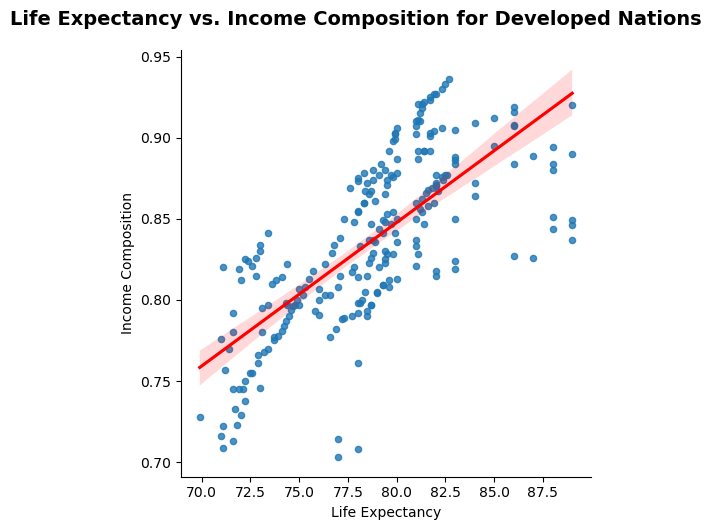

In [45]:
df_var4cleaned = pd.DataFrame({'Life Expectancy': clean_lifeexp_dev,'Income Composition': clean_income_dev})

plot = sns.lmplot(x="Life Expectancy", y="Income Composition", data=df_var4cleaned, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.suptitle("Life Expectancy vs. Income Composition for Developed Nations", size=14, weight='bold', y=1.05)
plt.show()